In [6]:
import numpy as np

In [1]:
reads ='/home/nikita/Projects/Chromosomal_aberrations/results_inv/Caulobacter_BglII_replicate1_inv/03_filtering/reads12.tsv'

In [2]:
from pytadbit.parsers.hic_parser import load_hic_data_from_reads
reso=10000

IMP not found, check PYTHONPATH
/home/nikita/miniconda2/lib/python2.7/site-packages/pytadbit/__init__.py:126: UserWarning: IMP not found, check PYTHONPATH

  warn('IMP not found, check PYTHONPATH\n')


In [3]:
hic_data = load_hic_data_from_reads(reads,  reso)
matrix = hic_data.get_matrix(focus=None, diagonal=True, normalized=False)

In [4]:
len(matrix[0])
import matplotlib.pyplot as plt

In [37]:
beg, end = 1000000 / reso, 1500000 / reso

In [35]:
nrows = 405
new_matrix = []
for k, m in enumerate(matrix):
    line = m[k:] + m[0:k]
    new_matrix.append(list(np.array(line[0:nrows/2]) + np.array(line[-nrows/2+1:][::-1])))

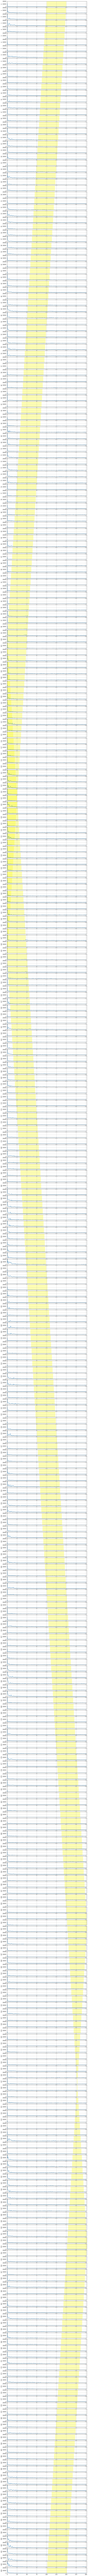

In [62]:
plt.figure(figsize=(12, 400))
for k in xrange(0, nrows):
    plt.subplot(nrows, 1, k + 1)
#     plt.plot(np.log2(new_matrix[k]), alpha=1)
    plt.plot(new_matrix[k], alpha=1)
    pos1 = min(abs(beg - k), min(k, beg) + (nrows - max(k, beg)))
    pos2 = min(abs(end - k), min(k, end) + (nrows - max(k, end)))
    pos1, pos2 = sorted([pos1, pos2])
    if beg < k < end:
        plt.fill_between([0, pos1], 0, 25000, alpha=0.3, color='yellow')
        plt.fill_between([0, pos2], 0, 25000, alpha=0.3, color='yellow')
    else:
        plt.fill_between([pos1, pos2], 0, 25000, alpha=0.3, color='yellow')
    plt.ylim(0, 20000)
    plt.xlim(0, nrows / 2)
    plt.grid()
    plt.ylabel(k)
plt.show()